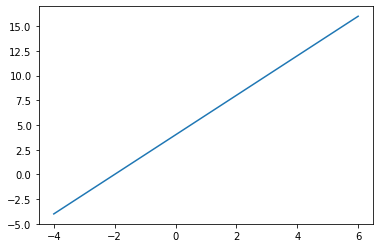

In [2]:
# create some x and y date
from matplotlib import pyplot as plt
x_list = [-4.0, -2.0, 3.0, 4.0, 5.0, 6.0]
y_list = list()
m = 2
b = 4


for x in x_list:
    y = (m*x) + b
    y_list.append(y)
    
plt.plot(x_list, y_list)
